Graph successfully loaded with 1226 nodes and 2615 edges.


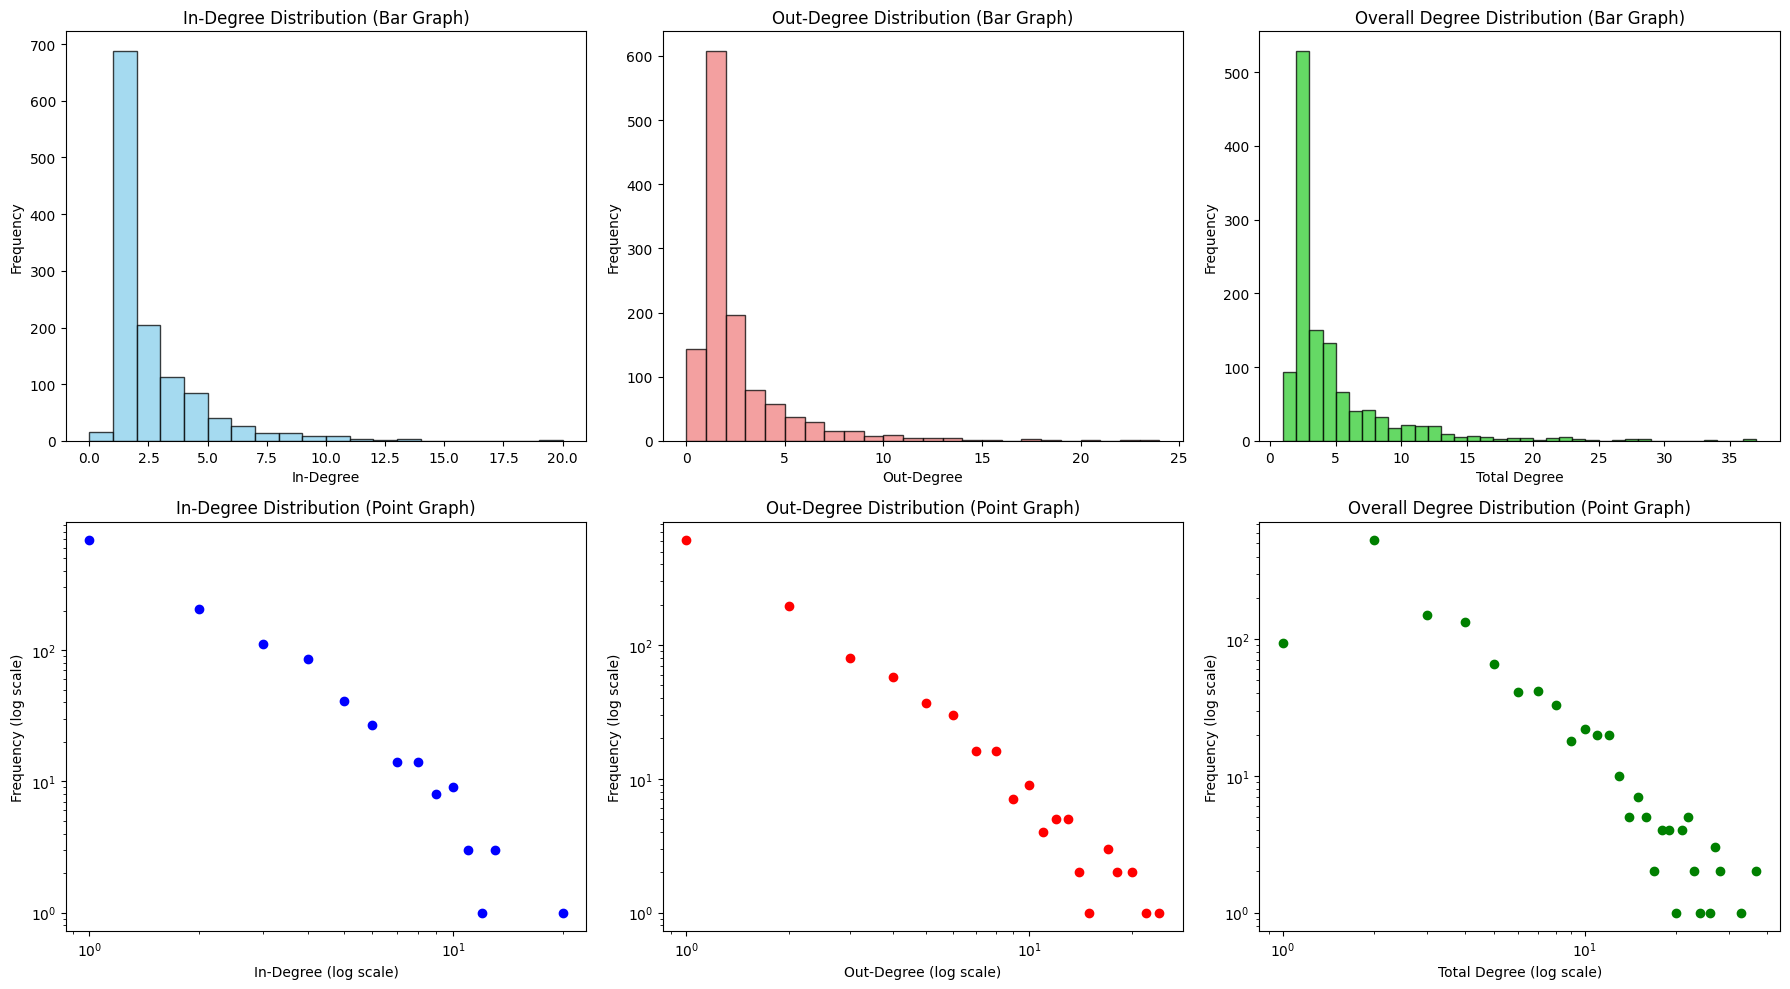

+---------------+-------+-------+-------+-----------+
| Degree Type   |   Max |   Min |   Avg |   Std Dev |
+===============+=======+=======+=======+===========+
| In-Degree     |    20 |     0 |  2.13 |      1.99 |
+---------------+-------+-------+-------+-----------+
| Out-Degree    |    24 |     0 |  2.13 |      2.68 |
+---------------+-------+-------+-------+-----------+
| Total Degree  |    37 |     1 |  4.27 |      4.33 |
+---------------+-------+-------+-------+-----------+


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

file_path = r"/Users/harshil/SNUC_Subjects/Sem 6/SNA/SNA - Air Traffic Control/out.maayan-faa"

# Read file while ignoring comments
with open(file_path, "r") as f:
    edges = [line.strip().split()[:2] for line in f if not line.startswith("%")]  # Read only first two columns

# Convert node IDs to integers
edges = [(int(u), int(v)) for u, v in edges]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

print("Graph successfully loaded with", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges.")

# Compute in-degree, out-degree, and overall degree
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]
total_degrees = [d for _, d in G.degree()]  # Sum of in-degree and out-degree

# Compute unique degree values and their frequencies
unique_in_degrees, in_counts = np.unique(in_degrees, return_counts=True)
unique_out_degrees, out_counts = np.unique(out_degrees, return_counts=True)
unique_total_degrees, total_counts = np.unique(total_degrees, return_counts=True)

# Plot settings
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

# Bar Graphs (Top Row)
axs[0, 0].hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), edgecolor="black", alpha=0.75, color="skyblue")
axs[0, 0].set_xlabel("In-Degree")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("In-Degree Distribution (Bar Graph)")

axs[0, 1].hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), edgecolor="black", alpha=0.75, color="lightcoral")
axs[0, 1].set_xlabel("Out-Degree")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("Out-Degree Distribution (Bar Graph)")

axs[0, 2].hist(total_degrees, bins=range(min(total_degrees), max(total_degrees) + 1), edgecolor="black", alpha=0.75, color="limegreen")
axs[0, 2].set_xlabel("Total Degree")
axs[0, 2].set_ylabel("Frequency")
axs[0, 2].set_title("Overall Degree Distribution (Bar Graph)")

# Point Graphs (Bottom Row - Log-Log Scale)
axs[1, 0].scatter(unique_in_degrees, in_counts, color="blue")
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].set_xlabel("In-Degree (log scale)")
axs[1, 0].set_ylabel("Frequency (log scale)")
axs[1, 0].set_title("In-Degree Distribution (Point Graph)")

axs[1, 1].scatter(unique_out_degrees, out_counts, color="red")
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_xlabel("Out-Degree (log scale)")
axs[1, 1].set_ylabel("Frequency (log scale)")
axs[1, 1].set_title("Out-Degree Distribution (Point Graph)")

axs[1, 2].scatter(unique_total_degrees, total_counts, color="green")
axs[1, 2].set_xscale("log")
axs[1, 2].set_yscale("log")
axs[1, 2].set_xlabel("Total Degree (log scale)")
axs[1, 2].set_ylabel("Frequency (log scale)")
axs[1, 2].set_title("Overall Degree Distribution (Point Graph)")

plt.tight_layout()
plt.show()

# Calculate in-degree, out-degree, and total degree
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]
total_degrees = [d for _, d in G.degree()]

# Compute statistics
degree_stats = [
    ["In-Degree", max(in_degrees), min(in_degrees), round(np.mean(in_degrees), 2), round(np.std(in_degrees), 2)],
    ["Out-Degree", max(out_degrees), min(out_degrees), round(np.mean(out_degrees), 2), round(np.std(out_degrees), 2)],
    ["Total Degree", max(total_degrees), min(total_degrees), round(np.mean(total_degrees), 2), round(np.std(total_degrees), 2)]
]

# Print table
print(tabulate(degree_stats, headers=["Degree Type", "Max", "Min", "Avg", "Std Dev"], tablefmt="grid"))

In [52]:
pip install --upgrade networkx matplotlib



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


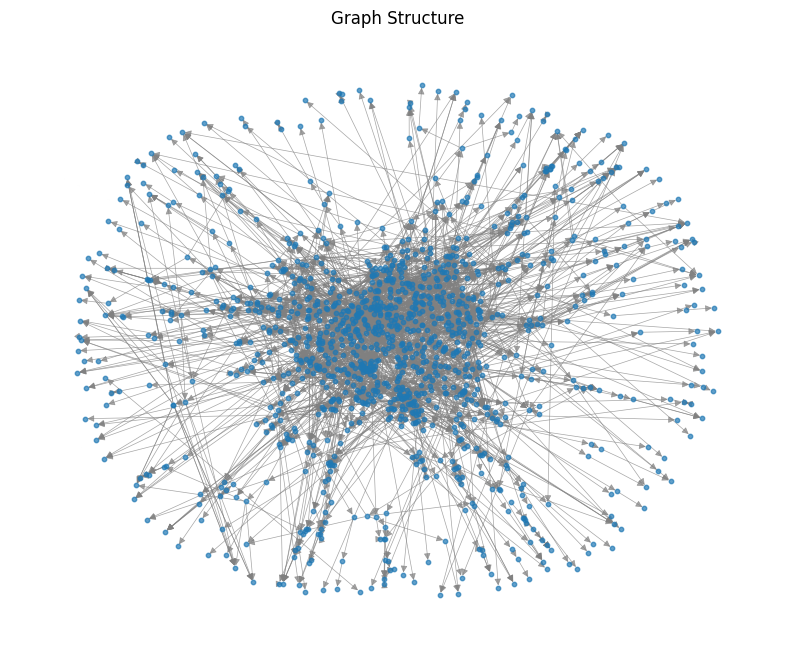

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, ax=ax, node_size=10, edge_color="gray", alpha=0.7, width=0.5)  
plt.title("Graph Structure")  
plt.show()


In [45]:
# ------------------------- Centrality Measures ------------------------- #
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-6, nstart={n: 1 for n in G.nodes()})
pagerank_centrality = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

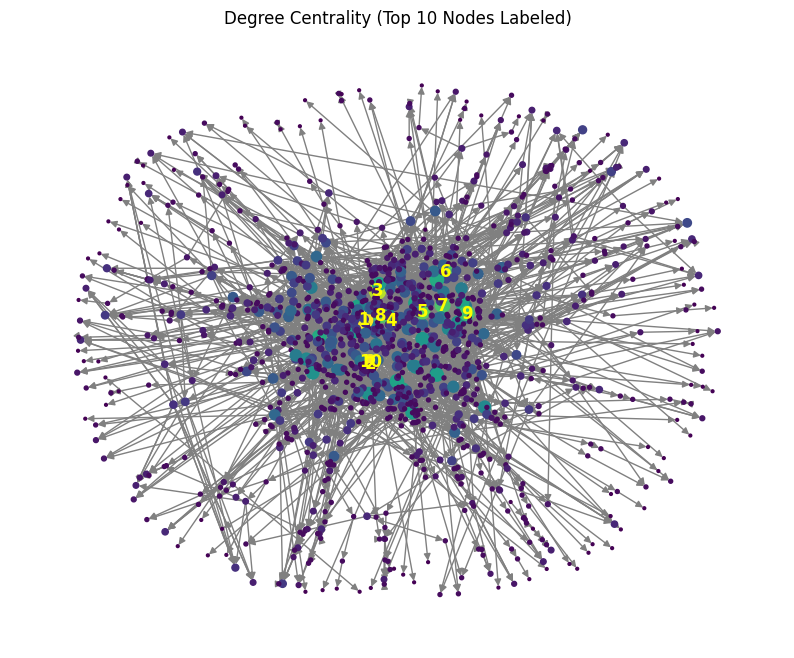


                                     Degree Centrality Analysis                                     
+--------+--------+----------+--------------+                 +----------------+--------------+
|   Rank |   Node |   Degree |   Centrality |                 | Degree Range   |   Node Count |
+========+========+==========+==============+                 +================+==============+
|      1 |     68 |       37 |       0.0302 |                 | 1-7            |         1054 |
+--------+--------+----------+--------------+                 +----------------+--------------+
|      2 |    312 |       37 |       0.0302 |                 | 8-14           |          128 |
+--------+--------+----------+--------------+                 +----------------+--------------+
|      3 |     52 |       33 |       0.0269 |                 | 15-21          |           27 |
+--------+--------+----------+--------------+                 +----------------+--------------+
|      4 |     44 |       28 |    

In [21]:
import networkx as nx
import numpy as np
from tabulate import tabulate

# Compute degree centrality and degree
degree_centrality = nx.degree_centrality(G)
degrees = dict(G.degree())  # Get node degrees

# Get the top 10 nodes by degree centrality
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Degree, Centrality)
table_data_top10 = [(i, node, degrees[node], round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top10 = ["Rank", "Node", "Degree", "Centrality"]

# Define degree bins
bin_size = 7
max_degree = max(degrees.values()) if degrees else 1
bins = list(range(1, max_degree + bin_size, bin_size))

# Count nodes in each bin
degree_counts, _ = np.histogram(list(degrees.values()), bins=bins)

# Prepare bin data
table_data_bins = [(f"{bins[i]}-{bins[i+1]-1}", degree_counts[i]) for i in range(len(bins) - 1)]
headers_bins = ["Degree Range", "Node Count"]

# Convert tables to string with tabulate
table1 = tabulate(table_data_top10, headers=headers_top10, tablefmt="grid").split("\n")
table2 = tabulate(table_data_bins, headers=headers_bins, tablefmt="grid").split("\n")

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * degree_centrality[node] for node in G]  # Scale node size
node_colors = list(degree_centrality.values())  # Node colors based on centrality

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Degree Centrality (Top 10 Nodes Labeled)")
plt.show()


# Adjust column widths by padding spaces
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Degree Centrality Analysis".center(100))

for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)


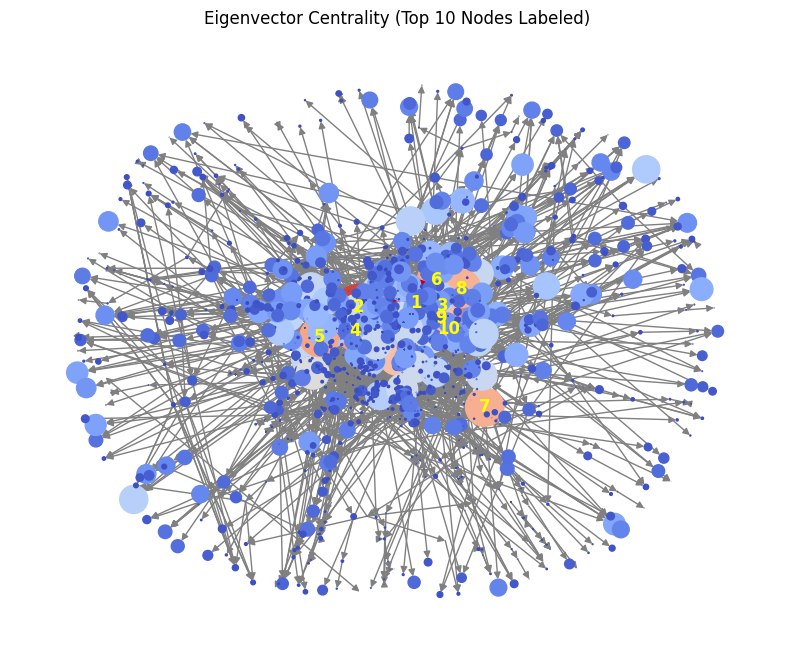

+--------+--------+----------+---------------+                +-------------+--------------+
|   Rank |   Node |   Degree |   Eigenvector |                | Range       |   Node Count |
+========+========+==========+===============+                +=============+==============+
|      1 |    116 |       22 |        0.2192 |                | 0.0 - 0.02  |          997 |
+--------+--------+----------+---------------+                +-------------+--------------+
|      2 |     34 |       22 |        0.2027 |                | 0.02 - 0.05 |          145 |
+--------+--------+----------+---------------+                +-------------+--------------+
|      3 |    110 |       27 |        0.177  |                | 0.05 - 0.1  |           63 |
+--------+--------+----------+---------------+                +-------------+--------------+
|      4 |     10 |       21 |        0.1598 |                | 0.1 - 0.15  |           13 |
+--------+--------+----------+---------------+                +-------

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate


# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
degrees = dict(G.degree())

# Get the top 10 nodes by eigenvector centrality
top_10_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Rank, Node, Degree, Centrality)
table_top_10 = [(i, node, degrees[node], round(centrality, 4)) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers_top_10 = ["Rank", "Node", "Degree", "Eigenvector"]

# Define eigenvector centrality ranges
ranges = [(0.0, 0.02), (0.02, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25)]
range_counts = {f"{low} - {high}": sum(1 for v in eigenvector_centrality.values() if low <= v < high) for low, high in ranges}
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Range", "Node Count"]

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the graph
node_sizes = [5000 * eigenvector_centrality[node] for node in G]
node_colors = list(eigenvector_centrality.values())

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm, edge_color="gray")

# Label the top 10 nodes
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

ax.set_title("Eigenvector Centrality (Top 10 Nodes Labeled)")
plt.show()

# Convert tables to tabulated strings
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)


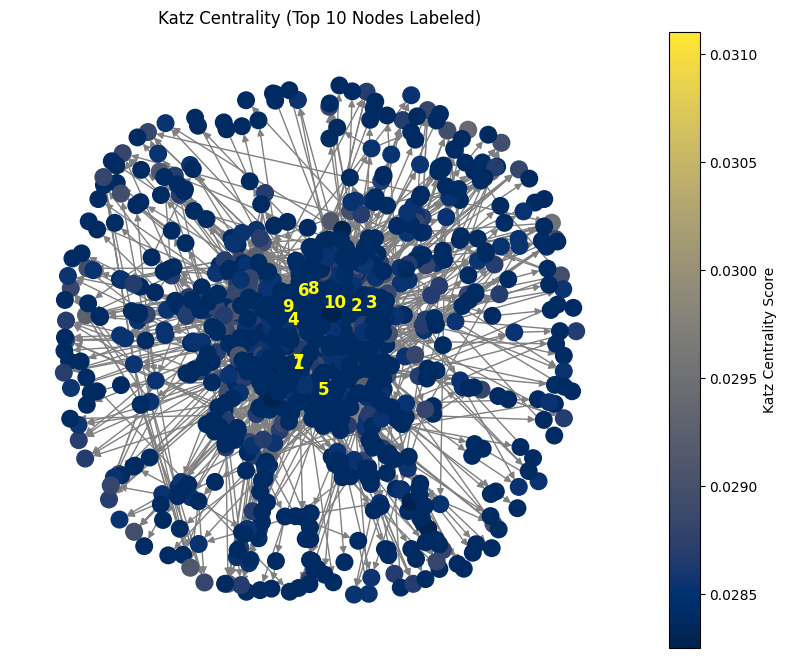


                                      Katz Centrality Analysis                                      
+--------+--------+----------+-------------------+            +-------------------------+--------------+
|   Rank |   Node |   Degree |   Katz Centrality |            | Katz Centrality Range   |   Node Count |
+========+========+==========+===================+            +=========================+==============+
|      1 |    312 |       37 |          0.031103 |            | 0.000 - 0.020           |            0 |
+--------+--------+----------+-------------------+            +-------------------------+--------------+
|      2 |    110 |       27 |          0.030139 |            | 0.020 - 0.025           |            0 |
+--------+--------+----------+-------------------+            +-------------------------+--------------+
|      3 |     82 |       22 |          0.030127 |            | 0.025 - 0.030           |         1222 |
+--------+--------+----------+-------------------+        

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Compute Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-6, nstart={n: 1 for n in G.nodes()})
degrees = dict(G.degree())

# Get top 10 nodes by Katz Centrality
top_10_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Rank, Node, Degree, Katz Centrality)
table_top_10 = [(i, node, degrees[node], round(centrality, 6)) for i, (node, centrality) in enumerate(top_10_katz, start=1)]
headers_top_10 = ["Rank", "Node", "Degree", "Katz Centrality"]

# Define custom Katz Centrality ranges
ranges = [(0.00, 0.02), (0.02, 0.025), (0.025, 0.03), (0.03, 0.04)]
range_counts = {f"{low:.3f} - {high:.3f}": sum(1 for v in katz_centrality.values() if low <= v < high) for low, high in ranges}
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Katz Centrality Range", "Node Count"]

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the graph with node sizes based on Katz Centrality
node_sizes = [5000 * katz_centrality[node] for node in G]  # Scale node sizes
node_colors = list(katz_centrality.values())

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.cividis, edge_color="gray")

# Label the top 10 nodes
for i, (node, _) in enumerate(top_10_katz, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis)
sm.set_array(list(katz_centrality.values()))
plt.colorbar(sm, ax=ax, label="Katz Centrality Score")

ax.set_title("Katz Centrality (Top 10 Nodes Labeled)")
plt.show()

# Convert tables to tabulated strings
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Katz Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)


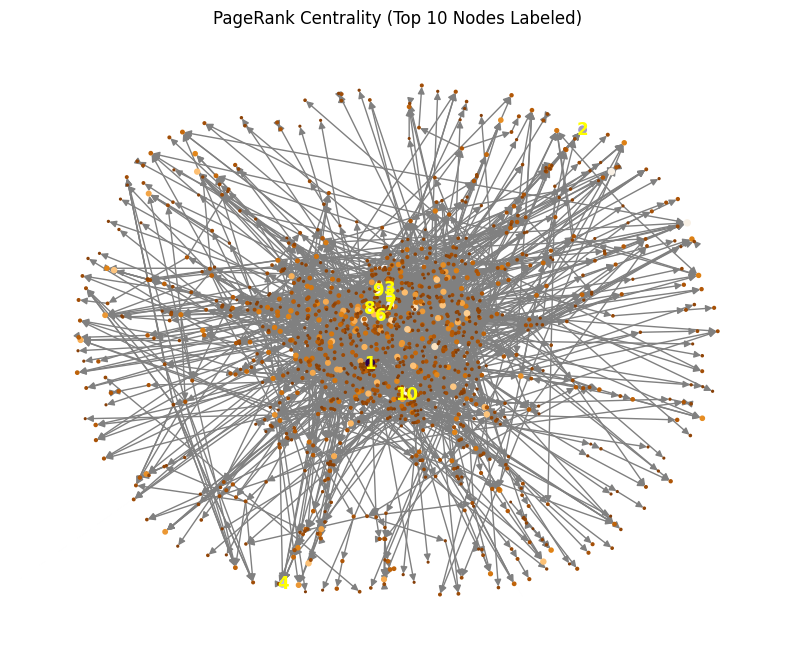


                                    PageRank Centrality Analysis                                    
+--------+--------+----------+------------+                   +------------------+--------------+
|   Rank |   Node |   Degree |   PageRank |                   | PageRank Range   |   Node Count |
+========+========+==========+============+                   +==================+==============+
|      1 |    312 |       37 |   0.007712 |                   | 0.000 - 0.001    |          953 |
+--------+--------+----------+------------+                   +------------------+--------------+
|      2 |     61 |        8 |   0.005694 |                   | 0.001 - 0.002    |          198 |
+--------+--------+----------+------------+                   +------------------+--------------+
|      3 |    105 |       12 |   0.005344 |                   | 0.002 - 0.003    |           58 |
+--------+--------+----------+------------+                   +------------------+--------------+
|      4 |     1

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Compute PageRank Centrality
pagerank_centrality = nx.pagerank(G)
degrees = dict(G.degree())

# Get top 10 nodes by PageRank
top_10_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Rank, Node, Degree, PageRank)
table_top_10 = [(i, node, degrees[node], round(centrality, 6)) for i, (node, centrality) in enumerate(top_10_pagerank, start=1)]
headers_top_10 = ["Rank", "Node", "Degree", "PageRank"]

# Define PageRank ranges (0.000 - 0.008 with 0.001 steps)
ranges = [(round(i, 3), round(i + 0.001, 3)) for i in [0.000, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007]]
range_counts = {f"{low:.3f} - {high:.3f}": sum(1 for v in pagerank_centrality.values() if low <= v < high) for low, high in ranges}
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["PageRank Range", "Node Count"]

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the graph
node_sizes = [5000 * pagerank_centrality[node] for node in G]
node_colors = list(pagerank_centrality.values())

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.PuOr, edge_color="gray")

# Label the top 10 nodes
for i, (node, _) in enumerate(top_10_pagerank, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

ax.set_title("PageRank Centrality (Top 10 Nodes Labeled)")
plt.show()

# Convert tables to tabulated strings
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "PageRank Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)


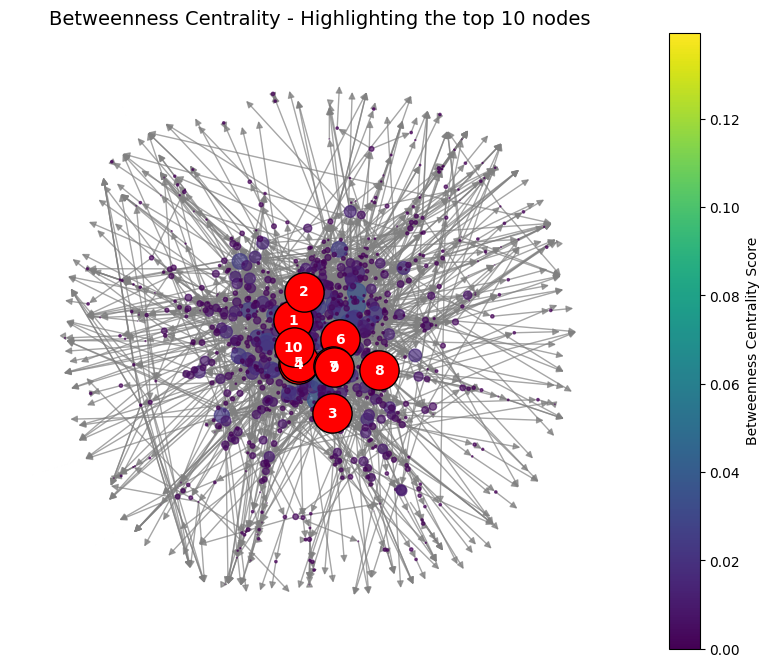


                                  Betweenness Centrality Analysis                                   
+--------+--------+--------------+                  +-------------+---------+
|   Rank |   Node |   Centrality |                  | Range       |   Count |
+========+========+==============+                  +=============+=========+
|      1 |     68 |       0.1395 |                  | 0.00 - 0.02 |    1175 |
+--------+--------+--------------+                  +-------------+---------+
|      2 |     52 |       0.0702 |                  | 0.02 - 0.04 |      43 |
+--------+--------+--------------+                  +-------------+---------+
|      3 |    212 |       0.0642 |                  | 0.04 - 0.06 |       5 |
+--------+--------+--------------+                  +-------------+---------+
|      4 |    312 |       0.0594 |                  | 0.06 - 0.08 |       2 |
+--------+--------+--------------+                  +-------------+---------+
|      5 |    135 |       0.0569 |      

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tabulate import tabulate

# Sort nodes by betweenness centrality in descending order
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Define Betweenness Ranges: 0.0 - 0.02, 0.02 - 0.04, ..., 0.1 - 0.14
range_bins = [(i / 100, (i + 2) / 100) for i in range(0, 12, 2)]
range_counts = {f"{low:.2f} - {high:.2f}": sum(1 for v in betweenness_centrality.values() if low <= v < high) for low, high in range_bins}

# ------------------------- PLOT: Betweenness Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis
pos = nx.spring_layout(G, seed=42)  # Graph layout

# Set node colors and sizes based on betweenness centrality
node_sizes = [5000 * betweenness_centrality[node] for node in G]
node_colors = list(betweenness_centrality.values())

# Draw the graph
nx.draw(
    G,
    pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    edge_color="gray",
    alpha=0.7
)

# Highlight top 10 nodes in red and number them 1-10
for i, (node, _) in enumerate(top_10_betweenness, 1):
    nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[node], node_size=800, node_color="red", edgecolors="black")
    plt.text(pos[node][0], pos[node][1], str(i), fontsize=10, fontweight="bold", color="white", ha="center", va="center")

# Create a ScalarMappable for the colorbar
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)  
cbar.set_label("Betweenness Centrality Score")

plt.title("Betweenness Centrality - Highlighting the top 10 nodes", fontsize=14)
plt.show()

# ------------------------- Print Tables Side by Side ------------------------- #
# Data for tables
top_10_table_data = [[i + 1, node, f"{betweenness_centrality[node]:.4f}"] for i, (node, _) in enumerate(top_10_betweenness)]
range_table_data = [[r, count] for r, count in range_counts.items()]

# Convert tables to string lists
table1 = tabulate(top_10_table_data, headers=["Rank", "Node", "Centrality"], tablefmt="grid").split("\n")
table2 = tabulate(range_table_data, headers=["Range", "Count"], tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Betweenness Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


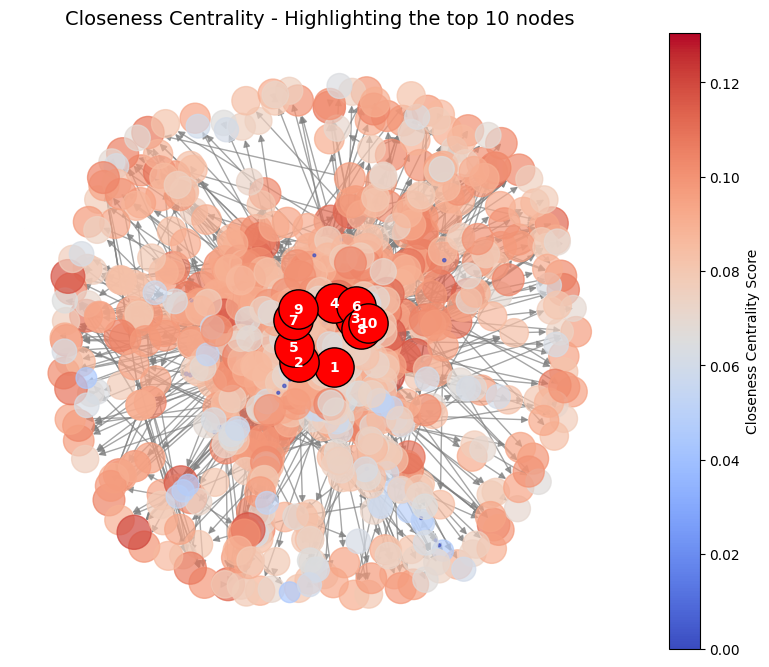


                                   Closeness Centrality Analysis                                    
+--------+--------+--------------+                  +-------------+---------+
|   Rank |   Node |   Centrality |                  | Range       |   Count |
+========+========+==============+                  +=============+=========+
|      1 |    148 |       0.1306 |                  | 0.00 - 0.02 |      59 |
+--------+--------+--------------+                  +-------------+---------+
|      2 |    135 |       0.1267 |                  | 0.02 - 0.04 |       0 |
+--------+--------+--------------+                  +-------------+---------+
|      3 |    124 |       0.125  |                  | 0.04 - 0.06 |      35 |
+--------+--------+--------------+                  +-------------+---------+
|      4 |    116 |       0.1242 |                  | 0.06 - 0.08 |     283 |
+--------+--------+--------------+                  +-------------+---------+
|      5 |    689 |       0.1241 |      

In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tabulate import tabulate

# Sort nodes by closeness centrality in descending order
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Define Closeness Ranges: 0.0 - 0.02, 0.02 - 0.04, ..., 0.1 - 0.14
range_bins = [(i / 100, (i + 2) / 100) for i in range(0, 12, 2)]
range_counts = {f"{low:.2f} - {high:.2f}": sum(1 for v in closeness_centrality.values() if low <= v < high) for low, high in range_bins}

# ------------------------- PLOT: Closeness Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis
pos = nx.spring_layout(G, seed=42)  # Graph layout

# Set node colors and sizes based on closeness centrality
node_sizes = [5000 * closeness_centrality[node] for node in G]
node_colors = list(closeness_centrality.values())

# Draw the graph
nx.draw(
    G,
    pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    edge_color="gray",
    alpha=0.7
)

# Highlight top 10 nodes in red and number them 1-10
for i, (node, _) in enumerate(top_10_closeness, 1):
    nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[node], node_size=800, node_color="red", edgecolors="black")
    plt.text(pos[node][0], pos[node][1], str(i), fontsize=10, fontweight="bold", color="white", ha="center", va="center")

# Create a ScalarMappable for the colorbar
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)  
cbar.set_label("Closeness Centrality Score")

plt.title("Closeness Centrality - Highlighting the top 10 nodes", fontsize=14)
plt.show()

# ------------------------- Print Tables Side by Side ------------------------- #
# Data for tables
top_10_table_data = [[i + 1, node, f"{closeness_centrality[node]:.4f}"] for i, (node, _) in enumerate(top_10_closeness)]
range_table_data = [[r, count] for r, count in range_counts.items()]

# Convert tables to string lists
table1 = tabulate(top_10_table_data, headers=["Rank", "Node", "Centrality"], tablefmt="grid").split("\n")
table2 = tabulate(range_table_data, headers=["Range", "Count"], tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Closeness Centrality Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


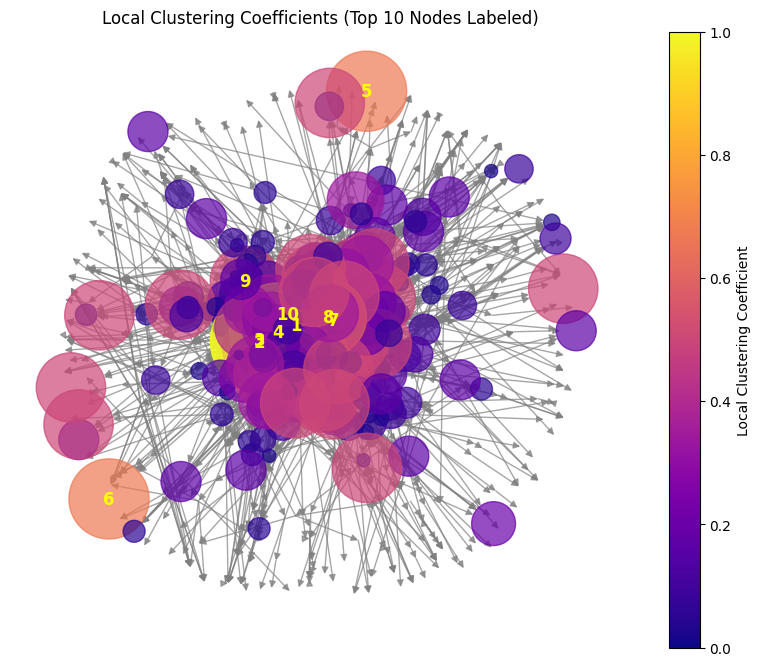

Average Local Clustering Coefficient: 0.0404

                               Local Clustering Coefficient Analysis                                
+--------+--------+----------+--------------------------------+  +--------------------------------+--------------+
|   Rank |   Node |   Degree |   Local Clustering Coefficient |  | Clustering Coefficient Range   |   Node Count |
+========+========+==========+================================+  +================================+==============+
|      1 |    133 |        3 |                       1        |  | 0.0 - 0.1                      |         1088 |
+--------+--------+----------+--------------------------------+  +--------------------------------+--------------+
|      2 |    313 |        2 |                       1        |  | 0.1 - 0.2                      |           88 |
+--------+--------+----------+--------------------------------+  +--------------------------------+--------------+
|      3 |    385 |        2 |                  

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute Local Clustering Coefficients
local_clustering = nx.clustering(G)
global_clustering = nx.transitivity(G)
average_local_clustering = np.mean(list(local_clustering.values()))
degrees = dict(G.degree())

# Get top 10 nodes by Local Clustering Coefficient
top_10_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Rank, Node, Degree, Local Clustering Coefficient)
table_top_10 = [(i, node, degrees[node], round(clustering, 6)) for i, (node, clustering) in enumerate(top_10_clustering, start=1)]
headers_top_10 = ["Rank", "Node", "Degree", "Local Clustering Coefficient"]

# Define Clustering Coefficient ranges (0.1 - 1.0 with 0.1 steps)
ranges = [(round(i, 1), round(i + 0.1, 1)) for i in np.arange(0.0, 1.0, 0.1)]
ranges.append((0.9, 1.0))  # Ensure last range includes 1.0

range_counts = {f"{low:.1f} - {high:.1f}": sum(1 for v in local_clustering.values() if low <= v <= high) for low, high in ranges}
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Clustering Coefficient Range", "Node Count"]

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the graph
node_sizes = [5000 * local_clustering[node] for node in G]
node_colors = list(local_clustering.values())

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, edge_color="gray", alpha=0.7)

# Label the top 10 nodes
for i, (node, _) in enumerate(top_10_clustering, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Fix colorbar issue
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Required for matplotlib
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Local Clustering Coefficient")

ax.set_title("Local Clustering Coefficients (Top 10 Nodes Labeled)")
plt.show()

# Print Average Clustering Coefficient
print(f"Average Local Clustering Coefficient: {average_local_clustering:.4f}")

# Convert tables to tabulated strings
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Local Clustering Coefficient Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(60) + "  " + row2)


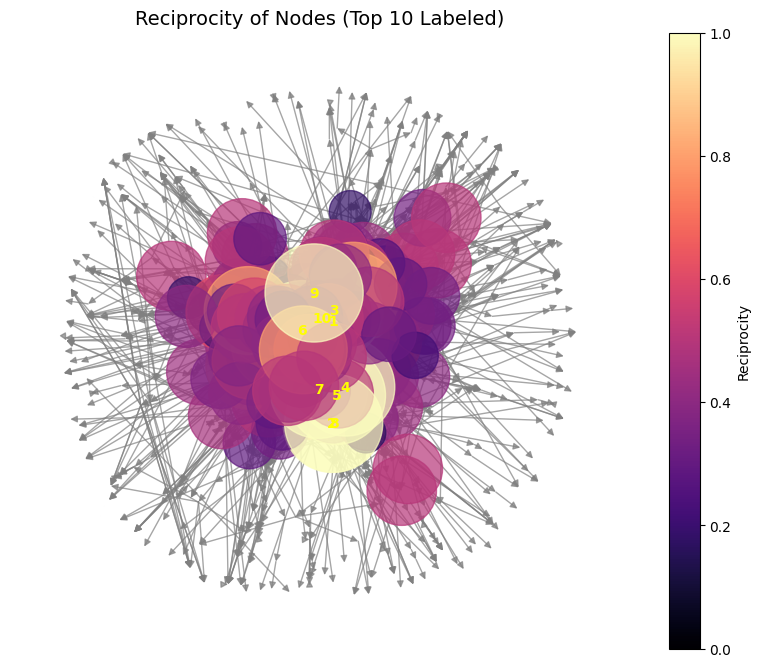


                                        Reciprocity Analysis                                        
+--------+--------+---------------+                 +---------------------+--------------+
|   Rank |   Node |   Reciprocity |                 | Reciprocity Range   |   Node Count |
+========+========+===============+                 +=====================+==============+
|      1 |    139 |        1      |                 | 0.0 - 0.1           |         1018 |
+--------+--------+---------------+                 +---------------------+--------------+
|      2 |    211 |        1      |                 | 0.1 - 0.2           |           33 |
+--------+--------+---------------+                 +---------------------+--------------+
|      3 |    262 |        1      |                 | 0.2 - 0.3           |           36 |
+--------+--------+---------------+                 +---------------------+--------------+
|      4 |    441 |        1      |                 | 0.3 - 0.4           |    

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute Reciprocity (only for nodes with defined values)
node_reciprocity = {node: nx.reciprocity(G, node) for node in G if nx.reciprocity(G, node) is not None}

# Get top 10 nodes by Reciprocity
top_10_reciprocity = sorted(node_reciprocity.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format
table_top_10 = [(i, node, round(recip, 4)) for i, (node, recip) in enumerate(top_10_reciprocity, start=1)]
headers_top_10 = ["Rank", "Node", "Reciprocity"]

# Define Reciprocity ranges (0.1 - 1.0 with 0.1 steps)
ranges = [(round(i, 1), round(i + 0.1, 1)) for i in np.arange(0.0, 1.0, 0.1)]
ranges.append((0.9, 1.0))  # Ensure last range includes 1.0

range_counts = {f"{low:.1f} - {high:.1f}": sum(1 for v in node_reciprocity.values() if low <= v <= high) for low, high in ranges}
table_ranges = [(r, count) for r, count in range_counts.items()]
headers_ranges = ["Reciprocity Range", "Node Count"]

# ------------------------- PLOT: Reciprocity ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * node_reciprocity.get(node, 0) for node in G]  # Scale node size
node_colors = [node_reciprocity.get(node, 0) for node in G]  # Set node color

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.magma, edge_color="gray", alpha=0.7)

# Label the top 10 nodes in the graph with their ranks (1-10)
for rank, (node, _) in enumerate(top_10_reciprocity, start=1):
    x, y = pos[node]
    ax.text(x, y, str(rank), fontsize=10, fontweight="bold", ha="center", va="center", color="yellow")

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.magma, norm=plt.Normalize(vmin=min(node_reciprocity.values()), vmax=max(node_reciprocity.values())))
sm.set_array([])  # Required for colorbar to work properly
cbar = plt.colorbar(sm, ax=ax, label="Reciprocity")

# Add title
plt.title("Reciprocity of Nodes (Top 10 Labeled)", fontsize=14)
plt.show()

# ------------------------- PRINT TABLES ------------------------- #
table1 = tabulate(table_top_10, headers=headers_top_10, tablefmt="grid").split("\n")
table2 = tabulate(table_ranges, headers=headers_ranges, tablefmt="grid").split("\n")

# Ensure both tables have the same number of rows
max_rows = max(len(table1), len(table2))
table1 += [""] * (max_rows - len(table1))
table2 += [""] * (max_rows - len(table2))

# Print side by side
print("\n" + "Reciprocity Analysis".center(100))
for row1, row2 in zip(table1, table2):
    print(row1.ljust(50) + "  " + row2)


Total number of activated nodes: 44
Number of steps to reach maximum activation: 6
Step-by-step activation counts: [23, 5, 3, 2, 1, 0]


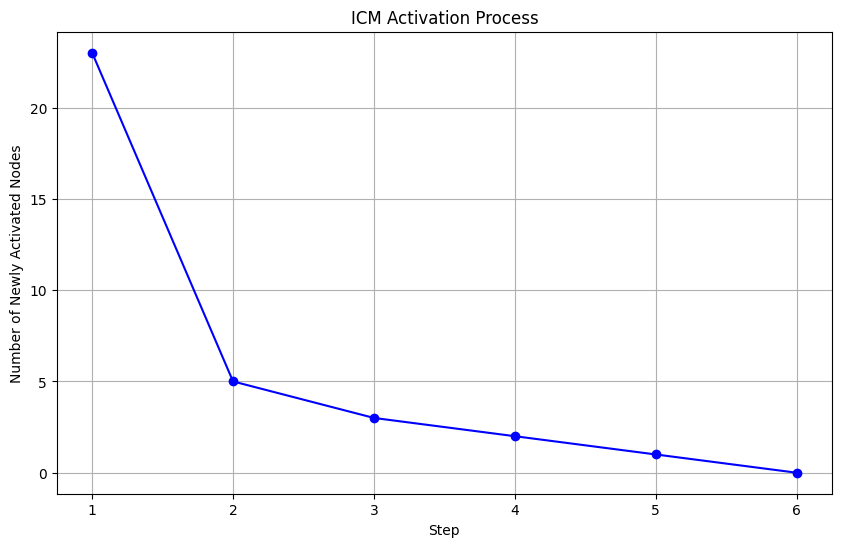

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Define the Independent Cascade Model function
def independent_cascade_model(G, seeds, prob=0.1, max_steps=None):
    """
    Simulates the Independent Cascade Model on a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.
        seeds (list): List of initial seed nodes.
        prob (float): Probability of activation for each edge.
        max_steps (int): Maximum number of steps to run the simulation (optional).
    
    Returns:
        activated_nodes (set): Set of all activated nodes.
        step_counts (list): Number of newly activated nodes at each step.
        steps (int): Total number of steps taken to reach the maximum activation.
    """
    # Initialize variables
    activated_nodes = set(seeds)  # Nodes that are already activated
    newly_activated = set(seeds)  # Nodes activated in the current step
    step_counts = []  # Track the number of newly activated nodes at each step
    steps = 0  # Track the number of steps
    
    # Run the cascade process
    while newly_activated:
        steps += 1
        current_activations = set()  # Nodes activated in this step
        
        # Attempt to activate neighbors of newly activated nodes
        for node in newly_activated:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated_nodes:  # Only try to activate inactive nodes
                    if random.random() < prob:  # Activation succeeds with probability `prob`
                        current_activations.add(neighbor)
        
        # Update the sets of activated nodes
        newly_activated = current_activations
        activated_nodes.update(newly_activated)
        step_counts.append(len(newly_activated))
        
        # Stop if no new activations occur or if max_steps is reached
        if len(newly_activated) == 0 or (max_steps and steps >= max_steps):
            break
    
    return activated_nodes, step_counts, steps

# Step 2: Apply ICM to the network
# Define the seed nodes (e.g., top 10 nodes by degree centrality)
degree_centrality = nx.degree_centrality(G)
top_seeds = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
seeds = [node for node, _ in top_seeds]

# Run the ICM with a fixed activation probability (e.g., 0.1)
activated_nodes, step_counts, steps = independent_cascade_model(G, seeds, prob=0.1)

# Step 3: Print results
print(f"Total number of activated nodes: {len(activated_nodes)}")
print(f"Number of steps to reach maximum activation: {steps}")
print(f"Step-by-step activation counts: {step_counts}")

# Step 4: Visualize the activation process
plt.figure(figsize=(10, 6))
plt.plot(range(1, steps + 1), step_counts, marker='o', color='blue')
plt.title("ICM Activation Process")
plt.xlabel("Step")
plt.ylabel("Number of Newly Activated Nodes")
plt.grid(True)
plt.show()

Trial 1:
  Seed nodes: [447, 324, 1116, 297, 783, 1001, 731, 250, 665, 1039]
  Total number of activated nodes: 11
  Number of steps to reach maximum activation: 2
Trial 2:
  Seed nodes: [439, 1055, 918, 426, 675, 940, 1114, 814, 177, 860]
  Total number of activated nodes: 12
  Number of steps to reach maximum activation: 3
Trial 3:
  Seed nodes: [148, 971, 512, 620, 646, 1187, 1216, 399, 56, 718]
  Total number of activated nodes: 11
  Number of steps to reach maximum activation: 2
Trial 4:
  Seed nodes: [174, 194, 386, 697, 1014, 1164, 796, 771, 683, 179]
  Total number of activated nodes: 18
  Number of steps to reach maximum activation: 4
Trial 5:
  Seed nodes: [1153, 830, 250, 71, 1157, 618, 921, 966, 269, 890]
  Total number of activated nodes: 16
  Number of steps to reach maximum activation: 5

Summary of Results:
Average number of steps to reach maximum activation: 3.20
Average number of activated nodes: 13.60


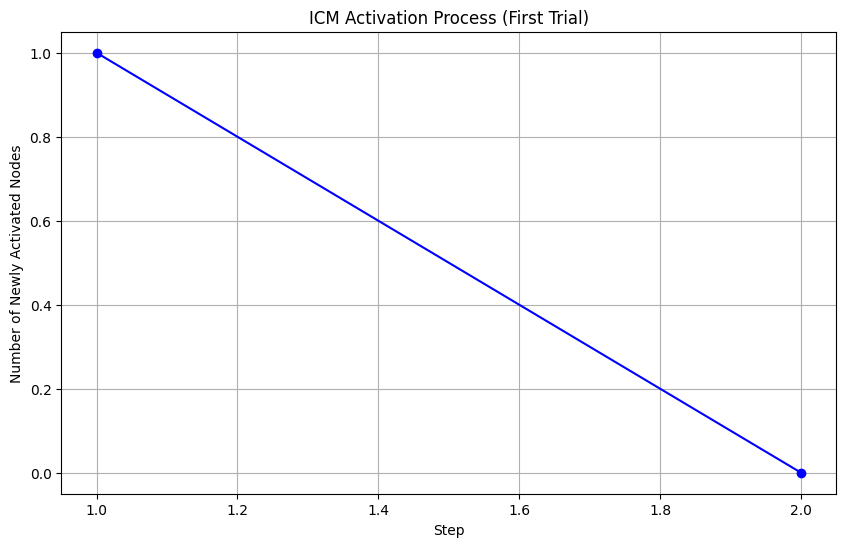

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Define the Independent Cascade Model function
def independent_cascade_model(G, seeds, prob=0.1, max_steps=None):
    """
    Simulates the Independent Cascade Model on a graph.
    
    Parameters:
        G (networkx.Graph): The input graph.
        seeds (list): List of initial seed nodes.
        prob (float): Probability of activation for each edge.
        max_steps (int): Maximum number of steps to run the simulation (optional).
    
    Returns:
        activated_nodes (set): Set of all activated nodes.
        step_counts (list): Number of newly activated nodes at each step.
        steps (int): Total number of steps taken to reach the maximum activation.
    """
    # Initialize variables
    activated_nodes = set(seeds)  # Nodes that are already activated
    newly_activated = set(seeds)  # Nodes activated in the current step
    step_counts = []  # Track the number of newly activated nodes at each step
    steps = 0  # Track the number of steps
    
    # Run the cascade process
    while newly_activated:
        steps += 1
        current_activations = set()  # Nodes activated in this step
        
        # Attempt to activate neighbors of newly activated nodes
        for node in newly_activated:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated_nodes:  # Only try to activate inactive nodes
                    if random.random() < prob:  # Activation succeeds with probability `prob`
                        current_activations.add(neighbor)
        
        # Update the sets of activated nodes
        newly_activated = current_activations
        activated_nodes.update(newly_activated)
        step_counts.append(len(newly_activated))
        
        # Stop if no new activations occur or if max_steps is reached
        if len(newly_activated) == 0 or (max_steps and steps >= max_steps):
            break
    
    return activated_nodes, step_counts, steps

# Step 2: Run ICM multiple times with different seed nodes
num_trials = 5  # Number of trials
activation_prob = 0.1  # Activation probability
steps_list = []  # To store the number of steps for each trial
activated_nodes_list = []  # To store the total number of activated nodes for each trial
all_step_counts = []  # To store step counts for each trial

for trial in range(num_trials):
    # Randomly select seed nodes for each trial
    seeds = random.sample(list(G.nodes()), 10)  # Select 10 random nodes as seeds
    
    # Run the ICM simulation
    activated_nodes, step_counts, steps = independent_cascade_model(G, seeds, prob=activation_prob)
    
    # Record results
    steps_list.append(steps)
    activated_nodes_list.append(len(activated_nodes))
    all_step_counts.append(step_counts)  # Save step counts for visualization
    
    # Print results for the current trial
    print(f"Trial {trial + 1}:")
    print(f"  Seed nodes: {seeds}")
    print(f"  Total number of activated nodes: {len(activated_nodes)}")
    print(f"  Number of steps to reach maximum activation: {steps}")

# Step 3: Calculate and print the average results
average_steps = sum(steps_list) / num_trials
average_activated_nodes = sum(activated_nodes_list) / num_trials

print("\nSummary of Results:")
print(f"Average number of steps to reach maximum activation: {average_steps:.2f}")
print(f"Average number of activated nodes: {average_activated_nodes:.2f}")

# Step 4: Visualize the activation process for the first trial
plt.figure(figsize=(10, 6))
first_trial_step_counts = all_step_counts[0]  # Step counts for the first trial
plt.plot(range(1, len(first_trial_step_counts) + 1), first_trial_step_counts, marker='o', color='blue')
plt.title("ICM Activation Process (First Trial)")
plt.xlabel("Step")
plt.ylabel("Number of Newly Activated Nodes")
plt.grid(True)
plt.show()